#### 1. Подготовка данных


- Pclass - класс билета. 1 -> первому классу, 2 -> второму классу, 3 -> 3 классу. Всего есть 3 класса билетов. (Количественная)

- Sex - пол пассажира. (качественная)

- Age - возраст пассажира, в тренировочной выборке имеет тип {:.2f} - Так как на корабле присутствовали дети. (Количественная)

- SibSp - сумма кол-ва братьев, сестёр, супругов, путешествующих вместе. (Количественная)

- Parch - кол-во родителей и детей, путешествующих с пассажиром (Количественная)

- Ticket - номер билета (Качественная)

- Fare -  Сумма, которую заплатил пассажир за путешествие (Количественная)

- Embarked - Порт отправления данного пассажира.(Качественная)

Важно отметить, что не все поля наполнены на 100%, например поле Age имеет всего 714/891 не нулевых строк 
Поле Cabin - всего 204 не нулевых поля.



In [3]:
import pandas as pd
import numpy as np
import sklearn.metrics
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt

if __name__ == "__main__":
    test = pd.read_csv("C:/Users/Timofey/PycharmProjects/pythonProject/Data_preparation/titanic/test.csv", sep=',')
    train = pd.read_csv("C:/Users/Timofey/PycharmProjects/pythonProject/Data_preparation/titanic/train.csv", sep=',')
    pd.set_option('display.max_columns', None)
    print(train.head(5))
    print(f"Размер выборки, кол-во столбцов: {train.shape}")
    print("Посмотрим на то, как устроены данные:")
    print(train.describe())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
Ра

 Проведём визуальный анализ данных чтобы понять, как различные признаки влияют на целевой.

In [4]:
print(train.describe(include=['O']), end="\n -------------------------- \n")
print("Проверим кол-вол NULL значений")
print(train.info(), end="\n -------------------------- \n")

                       Name   Sex  Ticket Cabin Embarked
count                   891   891     891   204      889
unique                  891     2     681   147        3
top     Dooley, Mr. Patrick  male  347082    G6        S
freq                      1   577       7     4      644
 -------------------------- 
Проверим кол-вол NULL значений
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11 

In [5]:
print(train.isnull().sum(),end="\n -------------------------- \n", )

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
 -------------------------- 


Исследование зависимостей Features and Survival:
Посмотрим на то, как разные значения полей отображают разные шансы на выживание.

In [6]:
print(train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean())

   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363


Можно сразу сделать вывод, что чем выше был класс пассажира, тем больше были его шансы на выживание.

<Axes: xlabel='Pclass', ylabel='Survived'>

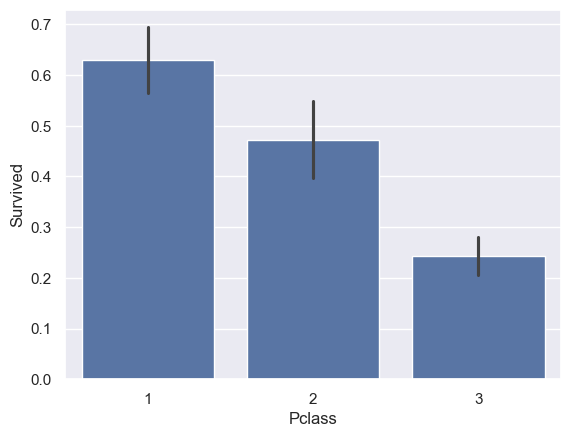

In [7]:
sns.barplot(x='Pclass', y='Survived', data=train)

Продолжим искать зависимости между переменными

In [8]:
train['Sex'].value_counts()
train.groupby('Sex').Survived.value_counts()
train[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


<Axes: xlabel='Sex', ylabel='Survived'>

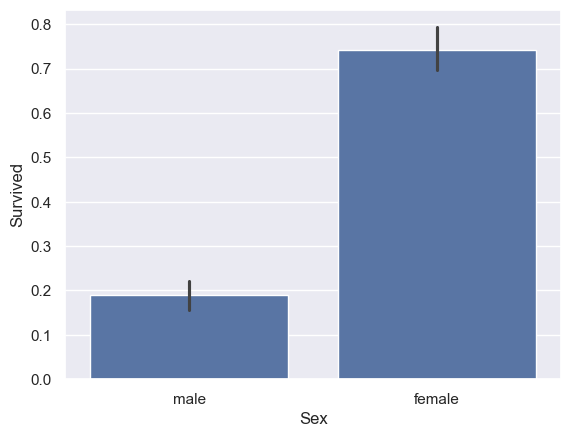

In [9]:
sns.barplot(x = 'Sex', y = 'Survived', data= train)

Теперь попробуем посмотреть на кросстабуляцию Pclass and Sex

Sex     female  male
Pclass              
1           94   122
2           76   108
3          144   347


<Axes: xlabel='Pclass'>

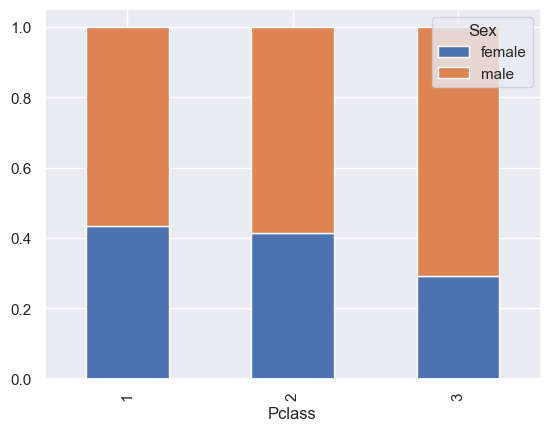

In [10]:
tab = pd.crosstab(train['Pclass'], train['Sex'])
print (tab)
tab.div(tab.sum(1).astype(float), axis=0).plot(kind='bar', stacked= True)


<Axes: xlabel='Embarked', ylabel='Survived'>

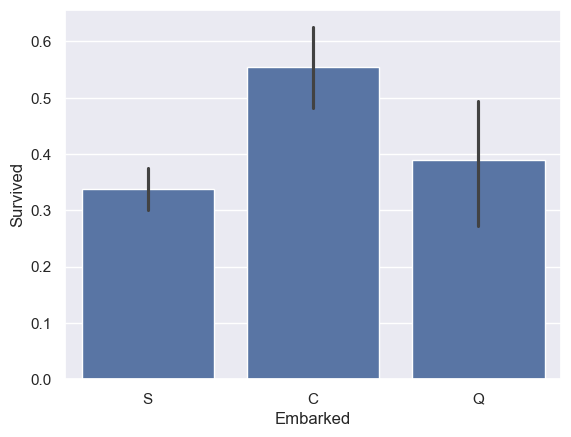

In [11]:
train[['Embarked', 'Survived']].groupby(['Embarked']).mean()
sns.barplot(x = 'Embarked', y = 'Survived', data= train)

Можно заметить, что у тех, кто садился на корабль с порта С выживаемость в среднем была выше.

<Axes: xlabel='Parch', ylabel='Survived'>

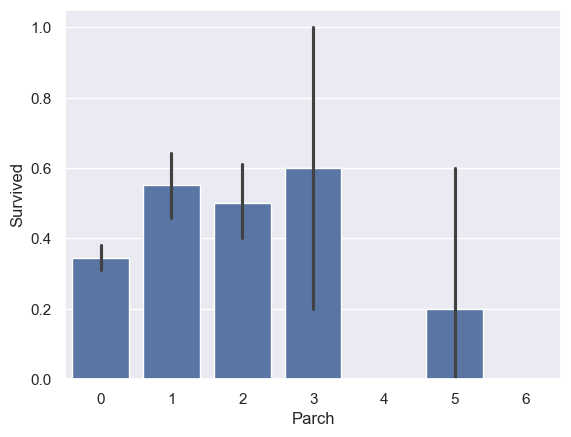

In [12]:
train[['Parch', 'Survived']].groupby(['Parch']).mean()
sns.barplot(x = 'Parch', y = 'Survived', data= train)

Вывод с кол-вом детей и родителей довольно необычный, в том случае если у вас нет родителей и детей на борту или их слишком много >= 5 шансы на выживание снижаются.

<Axes: xlabel='SibSp', ylabel='Survived'>

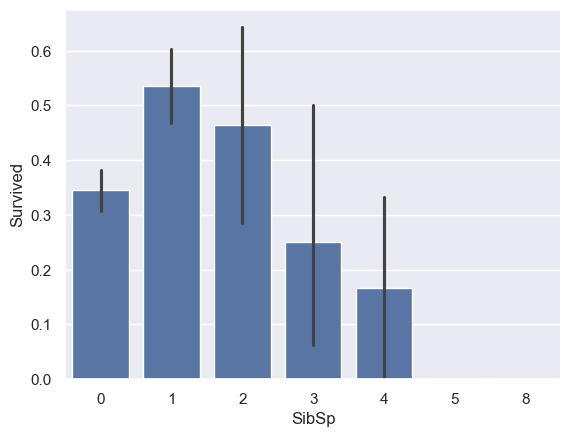

In [13]:
train[['SibSp', 'Survived']].groupby(['SibSp']).mean()
sns.barplot(x = 'SibSp', y = 'Survived', data= train)

Можно заключить, что шансы выжить, если вы приехали отдыхать с женой были больше, чем если без неё.

<Axes: xlabel='Sex', ylabel='Age'>

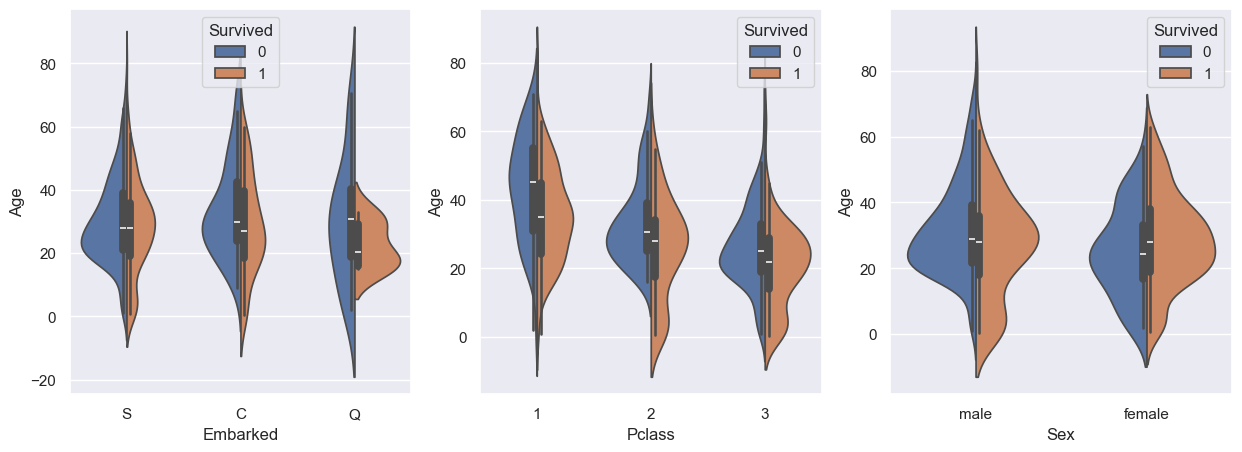

In [14]:
fig = plt.figure(figsize= (15, 5))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)

sns.violinplot(x='Embarked', y='Age', hue="Survived", data= train,split=True, ax=ax1)
sns.violinplot(x='Pclass', y='Age', hue='Survived', data=train, split=True, ax= ax2)
sns.violinplot(x='Sex', y='Age', hue='Survived', data=train, split=True, ax=ax3)

Таким образом получаем следующие выводы:
- Средней возраст пассажиров первого класса окло 35 лет, при этом среди них почти нет детей.
- Среди всех пассажиров второго класса в первую очередь спасали детей в возрасте от 0 до 15 лет.
- Более молодые люди из первого класса спасались чаще по сравнению к более пожилым.
- Среди пассажиров 3 класса тоже в первую очередь спасали детей. (почти всех спасли)
- Большинство детей мужского пола (в возрасте от 0 до 14) спаслись.
- Девушки и жещины в возрасте от 18 до 40 имели (в оригинале - имеют) больший шанс на спасение.

<Axes: >

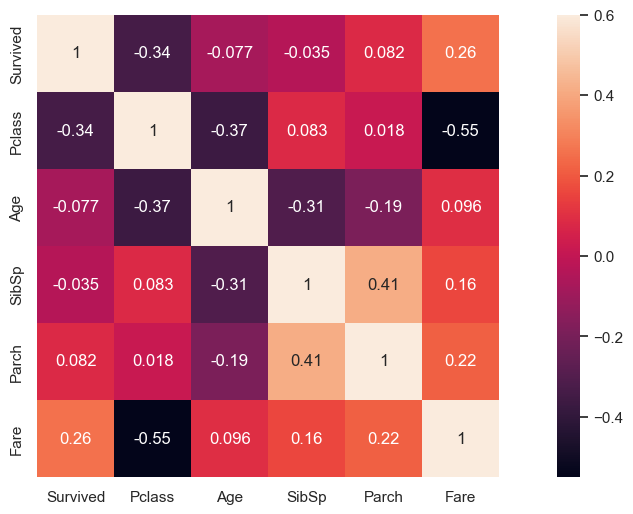

In [15]:

plt.figure(figsize=(15,6))
sns.heatmap(train[['Survived','Pclass', 'Age', 'SibSp', 'Parch', 'Fare']].corr(), vmax=0.6, square=True, annot=True)

В целом основные корреляции мы уже подметили:
- Сильная связь между Pclass и Survived (со знаком -, так как чем меньше класс 3 -> 1 тем лучше)
- Также связь между Age и Pclass. Говорили, что среди пассажиров 1 класса почти нет детей
- Ну и что совсем неудивитель - так это связь между стоимостью билета и классом пассажира - тут тоже сильная корреляция 

#### 2. Выделение признаков

In [16]:
train_test_data = [train, test] # combining train and test dataset
for dataset in train_test_data:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

Поле Embarked содержит довольно много Nan значений, обработуем их модой.

In [17]:
train['Embarked'].value_counts()
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')

In [18]:
train['Embarked'].value_counts()

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

In [19]:
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].map({'S':0, 'C':1, 'Q':2}).astype(int)

In [20]:
train['Embarked'].value_counts()

Embarked
0    646
1    168
2     77
Name: count, dtype: int64

Теперь нужно заполнить поле Age - его мы заполним рандомными числами из множества: (E(Age) - $\sigma(Age)$, E(Age) + $\sigma(Age)$)  

In [21]:
for dataset in train_test_data:
    avr_age = dataset['Age'].mean()
    std_age = dataset['Age'].std()
    age_null_count = dataset['Age'].isnull().sum()

    age_null_random_list = np.random.randint(avr_age - std_age, avr_age + std_age, size=age_null_count)
    dataset['Age'][np.isnan(dataset['Age'])] = age_null_random_list
    dataset['Age'] = dataset['Age'].astype(int)

C:\Users\Timofey\AppData\Local\Temp\ipykernel_106240\2207991967.py:7: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  dataset['Age'][np.isnan(dataset['Age'])] = age_null_random_list
C:\Users\Timofey\AppData\Local\Temp\ipykernel_106240\22079919

In [22]:
train['AgeBand'] = pd.cut(train['Age'], 5)
print(train[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean())

         AgeBand  Survived
0  (-0.08, 16.0]  0.531532
1   (16.0, 32.0]  0.357303
2   (32.0, 48.0]  0.364706
3   (48.0, 64.0]  0.434783
4   (64.0, 80.0]  0.090909


C:\Users\Timofey\AppData\Local\Temp\ipykernel_106240\2181387790.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(train[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean())


После того как поделили наши возраста на 5 групп, поставим каждому возрасту соответствующее число.

In [23]:
for dataset in train_test_data:
    dataset.loc[(dataset['Age']<= 16), 'Age'] = 0 
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1 
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 64), 'Age'] = 4

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeBand
0,1,0,3,"Braund, Mr. Owen Harris",0,1,1,0,A/5 21171,7.2500,NaN,0,"(16.0, 32.0]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,2,1,0,PC 17599,71.2833,C85,1,"(32.0, 48.0]"
2,3,1,3,"Heikkinen, Miss. Laina",1,1,0,0,STON/O2. 3101282,7.9250,NaN,0,"(16.0, 32.0]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2,1,0,113803,53.1000,C123,0,"(32.0, 48.0]"
4,5,0,3,"Allen, Mr. William Henry",0,2,0,0,373450,8.0500,NaN,0,"(32.0, 48.0]"


Проверяем train() И test() На пустые значения.
Осталось только 2 поля, с пропущенными значениями:
- fare (test)
- cabin  
Разберёмся с Cabin

In [24]:
for dataset in train_test_data:
    dataset['Fare'] = dataset['Fare'].fillna(train['Fare'].mean())

In [25]:
train['FareBand'] = pd.qcut(train['Fare'], 4)
print(train[['FareBand', 'Survived']].groupby(['FareBand']).mean())

                 Survived
FareBand                 
(-0.001, 7.91]   0.197309
(7.91, 14.454]   0.303571
(14.454, 31.0]   0.454955
(31.0, 512.329]  0.581081


C:\Users\Timofey\AppData\Local\Temp\ipykernel_106240\933552410.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(train[['FareBand', 'Survived']].groupby(['FareBand']).mean())


In [26]:
for dataset in train_test_data:
    dataset.loc[(dataset['Fare'] <= 7.91), 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31.0), 'Fare'] = 2
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 512.329), 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

In [27]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeBand,FareBand
0,1,0,3,"Braund, Mr. Owen Harris",0,1,1,0,A/5 21171,0,NaN,0,"(16.0, 32.0]","(-0.001, 7.91]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,2,1,0,PC 17599,3,C85,1,"(32.0, 48.0]","(31.0, 512.329]"
2,3,1,3,"Heikkinen, Miss. Laina",1,1,0,0,STON/O2. 3101282,1,NaN,0,"(16.0, 32.0]","(7.91, 14.454]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2,1,0,113803,3,C123,0,"(32.0, 48.0]","(31.0, 512.329]"
4,5,0,3,"Allen, Mr. William Henry",0,2,0,0,373450,1,NaN,0,"(32.0, 48.0]","(7.91, 14.454]"


Добавим переменную, отвечающую за кол-во людей, с которым пассажиры отправили в путеществии.

In [28]:
for dataset in train_test_data:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

Проанализируем новую переменную:

<Axes: xlabel='FamilySize', ylabel='Survived'>

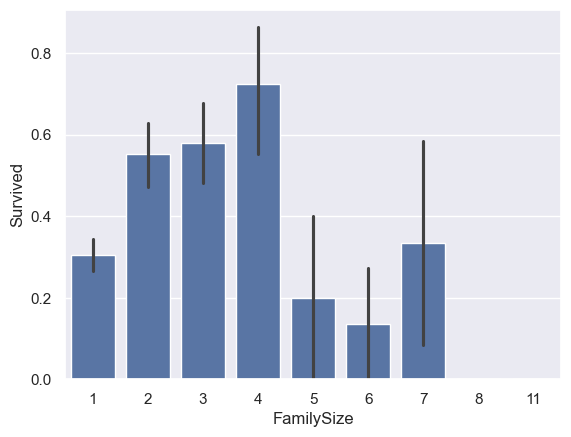

In [29]:
train[['FamilySize', 'Survived']].groupby(['FamilySize']).mean()
sns.barplot(x = 'FamilySize', y = 'Survived', data=train)

Добавим переменную IsAlone. Она говорит пассажир был один на корабле или с близкими.

In [30]:
for dataset in train_test_data:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1 

<Axes: xlabel='IsAlone', ylabel='Survived'>

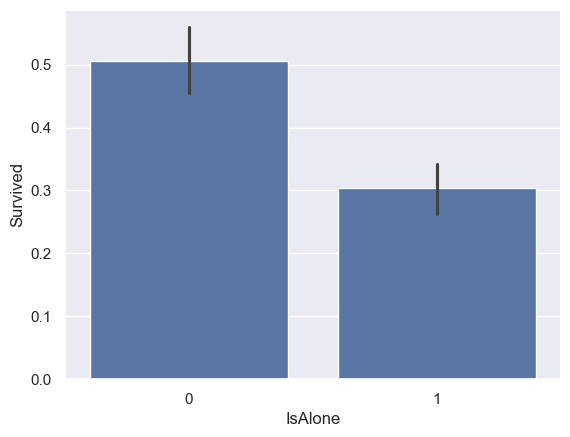

In [31]:
sns.barplot(x="IsAlone", y = 'Survived', data=train)

Получили, что в среднем путешествие в одиночку имело более низкие шансы на выживание.  
Теперь готовим данные к анализу с помощью машинного обучения.

In [32]:
col_drop = ['Name', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'FamilySize']
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeBand,FareBand,FamilySize,IsAlone
0,1,0,3,"Braund, Mr. Owen Harris",0,1,1,0,A/5 21171,0,NaN,0,"(16.0, 32.0]","(-0.001, 7.91]",2,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,2,1,0,PC 17599,3,C85,1,"(32.0, 48.0]","(31.0, 512.329]",2,0
2,3,1,3,"Heikkinen, Miss. Laina",1,1,0,0,STON/O2. 3101282,1,NaN,0,"(16.0, 32.0]","(7.91, 14.454]",1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2,1,0,113803,3,C123,0,"(32.0, 48.0]","(31.0, 512.329]",2,0
4,5,0,3,"Allen, Mr. William Henry",0,2,0,0,373450,1,NaN,0,"(32.0, 48.0]","(7.91, 14.454]",1,1


In [33]:
train = train.drop(col_drop, axis=1)
test = test.drop(col_drop, axis=1)
train = train.drop(['PassengerId', 'AgeBand', 'FareBand'], axis=1)

In [34]:
train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,IsAlone
0,0,3,0,1,0,0,0
1,1,1,1,2,3,1,0
2,1,3,1,1,1,0,1
3,1,1,1,2,3,0,0
4,0,3,0,2,1,0,1


<Axes: >

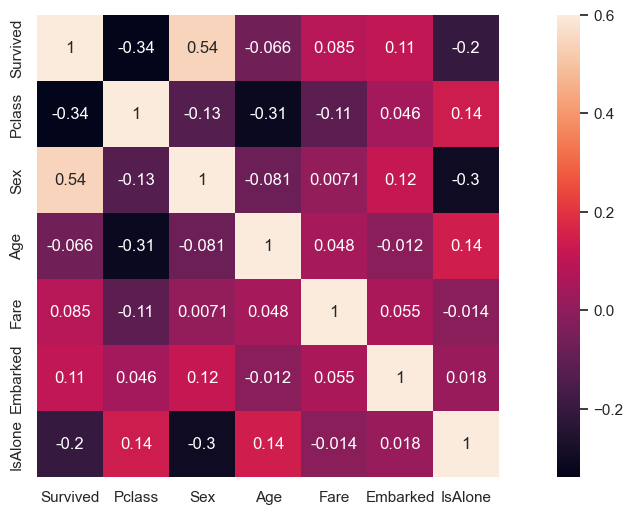

In [35]:
plt.figure(figsize=(15,6))
sns.heatmap(train.corr(), vmax=0.6, square=True, annot=True)

In [36]:
X_train = train.drop('Survived', axis=1)
y_train = train['Survived']

X_test = test.drop("PassengerId", axis=1).copy()

test_res = pd.read_csv("C:/Users/Timofey/PycharmProjects/pythonProject/Data_preparation/titanic/test_survived.csv", sep=',')

y_test = test_res['Survived']

#### 3. Классификация

In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

Начнём с Логистической регрессии.

In [38]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)
metric_log_reg = metrics.classification_report(y_test, y_pred_log_reg, digits = 2)
print(metric_log_reg)


              precision    recall  f1-score   support

           0       0.96      0.95      0.96       266
           1       0.92      0.93      0.93       152

    accuracy                           0.94       418
   macro avg       0.94      0.94      0.94       418
weighted avg       0.95      0.94      0.95       418



Теперь Support Vector Machine

In [39]:
svc = SVC()
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)
metric_svc = metrics.classification_report(y_test, y_pred_svc, digits = 2)
print(metric_svc)

              precision    recall  f1-score   support

           0       0.65      1.00      0.79       266
           1       1.00      0.06      0.11       152

    accuracy                           0.66       418
   macro avg       0.83      0.53      0.45       418
weighted avg       0.78      0.66      0.54       418



Как мы видим, данный метод несмотря на высокую точность, имеет ужасную полноту.  
Так что на фоне логистической регрессии, этот метод выглядит очень плохо.  
Следующим будет Random Forest

In [46]:
randForest = RandomForestClassifier()
randForest.fit(X_train, y_train)
y_pred_randForest = randForest.predict(X_test)
metric_rand_forest = metrics.classification_report(y_test, y_pred_randForest, digits = 2)
print(metric_rand_forest)

              precision    recall  f1-score   support

           0       0.86      0.90      0.88       266
           1       0.81      0.74      0.77       152

    accuracy                           0.84       418
   macro avg       0.83      0.82      0.83       418
weighted avg       0.84      0.84      0.84       418



In [41]:
DTC = DecisionTreeClassifier()
DTC.fit(X_train, y_train)
y_prediction_DTC = DTC.predict(X_test)
metric_DTC = metrics.classification_report(y_test, y_prediction_DTC, digits=2)
print(metric_DTC)

              precision    recall  f1-score   support

           0       0.86      0.92      0.89       266
           1       0.84      0.74      0.79       152

    accuracy                           0.85       418
   macro avg       0.85      0.83      0.84       418
weighted avg       0.85      0.85      0.85       418



In [42]:
neighbours = KNeighborsClassifier()
neighbours.fit(X_train, y_train)
y_prediction_neighbours = neighbours.predict(X_test)
metric_neighbour = metrics.classification_report(y_test, y_prediction_neighbours, digits=2)
print(metric_neighbour)

              precision    recall  f1-score   support

           0       0.87      0.92      0.89       266
           1       0.84      0.76      0.80       152

    accuracy                           0.86       418
   macro avg       0.85      0.84      0.84       418
weighted avg       0.86      0.86      0.86       418



#### 4. Качество

Ещё раз посмотрим на точность предсказаний всех наших моделей.

In [43]:
print("LogisticRegression:")
print(metric_log_reg)
print("-----------------------------")
print("Support Vector Machine")
print(metric_svc)
print("-----------------------------")
 

LogisticRegression:
              precision    recall  f1-score   support

           0       0.96      0.95      0.96       266
           1       0.92      0.93      0.93       152

    accuracy                           0.94       418
   macro avg       0.94      0.94      0.94       418
weighted avg       0.95      0.94      0.95       418

-----------------------------
Support Vector Machine
              precision    recall  f1-score   support

           0       0.65      1.00      0.79       266
           1       1.00      0.06      0.11       152

    accuracy                           0.66       418
   macro avg       0.83      0.53      0.45       418
weighted avg       0.78      0.66      0.54       418

-----------------------------


In [47]:
print("Rain Forest")
print(metric_rand_forest)
print("-----------------------------")
print("Desicion Tree")
print(metric_DTC)
print("-----------------------------")
print("K-Neighbours")
print(metric_neighbour)
print("-----------------------------")


Rain Forest
              precision    recall  f1-score   support

           0       0.86      0.90      0.88       266
           1       0.81      0.74      0.77       152

    accuracy                           0.84       418
   macro avg       0.83      0.82      0.83       418
weighted avg       0.84      0.84      0.84       418

-----------------------------
Desicion Tree
              precision    recall  f1-score   support

           0       0.86      0.92      0.89       266
           1       0.84      0.74      0.79       152

    accuracy                           0.85       418
   macro avg       0.85      0.83      0.84       418
weighted avg       0.85      0.85      0.85       418

-----------------------------
K-Neighbours
              precision    recall  f1-score   support

           0       0.87      0.92      0.89       266
           1       0.84      0.76      0.80       152

    accuracy                           0.86       418
   macro avg       0.85      

In [56]:
f1_log_reg = metrics.f1_score(y_test, y_pred_log_reg)
f1_svc = metrics.f1_score(y_test, y_pred_svc)
f1_rand_forest = metrics.f1_score(y_test, y_pred_randForest)
f1_decision_tree = metrics.f1_score(y_test, y_prediction_DTC)
f1_KNN = metrics.f1_score(y_test, y_prediction_neighbours)

In [57]:


models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Support Vector Machines',
              'KNN', 'Decision Tree', 'Random Forest'],
    
    'Score': [f1_log_reg, f1_svc, f1_KNN, f1_decision_tree, f1_rand_forest]
    })

models.sort_values(by='Score', ascending=False)

,Model,Score
0,Logistic Regression,0.925081
2,KNN,0.795848
3,Decision Tree,0.787456
4,Random Forest,0.773973
1,Support Vector Machines,0.111801


#### 5. Выводы

Наилучшие показатели:  
LogisticRegression:  

              precision    recall  f1-score   support

           0       0.97      0.96      0.97       266
           1       0.94      0.95      0.94       152

    accuracy                           0.96       418  
    macro avg       0.95      0.96      0.96       418  
    weighted avg       0.96      0.96      0.96       418


Logistic regression (or logit regression, or logit model) -- регрессионная модель, где зависимая величиная (DV) является категориальной.  
 Отлично подходит для описания бинарной зависимой величины, где она может применять только 2 значения, "0" и "1", которые представляют ответы вида успешно/нет, выигрыш/проигрыш, живой/мертый или здоровый/больной. Случаи когда зависимая величина имеет более 2 значений могут анализироваться с помощью мультиноминальной логистрического регрессии (multinomial logistic regression), или, если различные категории являются упорядоченными. то с помощью моделт упорядоченного выбора (ordinal logistic regression).